In [17]:
import json
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import metrics
import seaborn as sns
import matplotlib as plt

**Problem Statement**

In this project, you will create a recommendation system for restaurants using collaborative filtering (CF). You will be using the Yelp Dataset for this. 


**The general structure of a recommendation system is that there are users and there are items. Users express explicit or implicit preferences towards certain items.**

**The data**: https://www.yelp.com/dataset

Please read about the dataset here: https://www.yelp.com/dataset/documentation/main 

Outline of this Project
We want you to work on these two subtopics for the project:

**Base Model**: The base model is to answer the question for the user -  "give me more restaurants like this one" Create a database of item-item similarities. Build a CF-based Recommender system using Stochastic Gradient Descent. (70% of the project score)

**Your way to improve the project** - do further data analysis on the dataset and see if you can make an improvement to the base model created in part 1. This can be adding new features to the dataset to recommend the specific restaurant to users or to classify between two overlapping categories like nightlife and bars or restaurants and fast-food or checking how well a new restaurant will do in a certain neighborhood (30% of the project score)

**Don't Overscope** 🙅‍♀️🙅‍♂️

This project can be either very simple or very challenging depending on how far you'd like to go. It's impossible to try everything in one and a half weeks, so scope your project wisely. The bottom line is every group member should completely understand everything the group attempted. 

Don't use a model/algorithm you don't understand just because it performs better. The goal of the project is to practice what you learned, hone your research skills, and – most importantly – have great fun!

**NOTE** - Remember that the scope of this project is algorithms covered in this course. You may use one additional algorithm of your choice, provided you are fully aware of how it works.

##**user.json**

User data including the user's friend mapping and all the metadata associated with the user.

{
    // string, 22 character unique user id, maps to the user in user.json
    "user_id": "Ha3iJu77CxlrFm-vQRs_8g",

    // string, the user's first name
    "name": "Sebastien",

    // integer, the number of reviews they've written
    "review_count": 56,

    // string, when the user joined Yelp, formatted like YYYY-MM-DD
    "yelping_since": "2011-01-01",

    // array of strings, an array of the user's friend as user_ids
    "friends": [
        "wqoXYLWmpkEH0YvTmHBsJQ",
        "KUXLLiJGrjtSsapmxmpvTA",
        "6e9rJKQC3n0RSKyHLViL-Q"
    ],

    // integer, number of useful votes sent by the user
    "useful": 21,

    // integer, number of funny votes sent by the user
    "funny": 88,

    // integer, number of cool votes sent by the user
    "cool": 15,

    // integer, number of fans the user has
    "fans": 1032,

    // array of integers, the years the user was elite
    "elite": [
        2012,
        2013
    ],

    // float, average rating of all reviews
    "average_stars": 4.31,

    // integer, number of hot compliments received by the user
    "compliment_hot": 339,

    // integer, number of more compliments received by the user
    "compliment_more": 668,

    // integer, number of profile compliments received by the user
    "compliment_profile": 42,

    // integer, number of cute compliments received by the user
    "compliment_cute": 62,

    // integer, number of list compliments received by the user
    "compliment_list": 37,

    // integer, number of note compliments received by the user
    "compliment_note": 356,

    // integer, number of plain compliments received by the user
    "compliment_plain": 68,

    // integer, number of cool compliments received by the user
    "compliment_cool": 91,

    // integer, number of funny compliments received by the user
    "compliment_funny": 99,

    // integer, number of writer compliments received by the user
    "compliment_writer": 95,

    // integer, number of photo compliments received by the user
    "compliment_photos": 50
}

##**review.json**
Contains full review text data including the user_id that wrote the review and the business_id the review is written for.

{
    // string, 22 character unique review id
    "review_id": "zdSx_SD6obEhz9VrW9uAWA",

    // string, 22 character unique user id, maps to the user in user.json
    "user_id": "Ha3iJu77CxlrFm-vQRs_8g",

    // string, 22 character business id, maps to business in business.json
    "business_id": "tnhfDv5Il8EaGSXZGiuQGg",

    // integer, star rating
    "stars": 4,

    // string, date formatted YYYY-MM-DD
    "date": "2016-03-09",

    // string, the review itself
    "text": "Great place to hang out after work: the prices are decent, and the ambience is fun. It's a bit loud, but very lively. The staff is friendly, and the food is good. They have a good selection of drinks.",

    // integer, number of useful votes received
    "useful": 0,

    // integer, number of funny votes received
    "funny": 0,

    // integer, number of cool votes received
    "cool": 0
}

##**business.json**
Contains business data including location data, attributes, and categories.

{
    // string, 22 character unique string business id
    "business_id": "tnhfDv5Il8EaGSXZGiuQGg",

    // string, the business's name
    "name": "Garaje",

    // string, the full address of the business
    "address": "475 3rd St",

    // string, the city
    "city": "San Francisco",

    // string, 2 character state code, if applicable
    "state": "CA",

    // string, the postal code
    "postal code": "94107",

    // float, latitude
    "latitude": 37.7817529521,

    // float, longitude
    "longitude": -122.39612197,

    // float, star rating, rounded to half-stars
    "stars": 4.5,

    // integer, number of reviews
    "review_count": 1198,

    // integer, 0 or 1 for closed or open, respectively
    "is_open": 1,

    // object, business attributes to values. note: some attribute values might be objects
    "attributes": {
        "RestaurantsTakeOut": true,
        "BusinessParking": {
            "garage": false,
            "street": true,
            "validated": false,
            "lot": false,
            "valet": false
        },
    },

    // an array of strings of business categories
    "categories": [
        "Mexican",
        "Burgers",
        "Gastropubs"
    ],

    // an object of key day to value hours, hours are using a 24hr clock
    "hours": {
        "Monday": "10:00-21:00",
        "Tuesday": "10:00-21:00",
        "Friday": "10:00-21:00",
        "Wednesday": "10:00-21:00",
        "Thursday": "10:00-21:00",
        "Sunday": "11:00-18:00",
        "Saturday": "10:00-21:00"
    }
}

####**Convert JSON to csv**


**1. Loading Business.json**

df_yelp_business = pd.read_json('../input/yelp_academic_dataset_business.json', lines=True)
df_yelp_business.fillna('NA', inplace=True)

<i>**we want to make sure we only work with restaurants -- nothing else**
</i>

df_yelp_business = df_yelp_business[df_yelp_business['categories'].str.contains('Restaurants')]
print('Final Shape: ',df_yelp_business.shape)

**2. Loading review.json**

df_yelp_review_iter = pd.read_json('../input/yelp_academic_dataset_review.json', chunksize=100000, lines=True)

df_yelp_review = pd.DataFrame()
i=0
for df in df_yelp_review_iter:
    df = df[df['business_id'].isin(df_yelp_business['business_id'])]
    df_yelp_review = pd.concat([df_yelp_review, df])
    i=i+1
    print(i)
    if i==4: break

**3. Filtering**

df_yelp_business = df_yelp_business[df_yelp_business['business_id'].isin(df_yelp_review['business_id'])]


print('Final businesses shape: ', df_yelp_business.shape)
print('Final review shape: ', df_yelp_review.shape)

**Loading Business.csv**

In [18]:
#from google.colab import files
#uploaded = files.upload()

In [19]:
data = pd.read_csv("/content/df_yelp_business.csv")
data.head()

,Unnamed: 0,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,0,921 Pearl St,"{'RestaurantsTableService': 'True', 'WiFi': ""u...",6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,40.017544,-105.283348,Oskar Blues Taproom,80302,86,4.0,CO
1,1,7000 NE Airport Way,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...",tCbdrRPZA0oiIYSmHG3J0w,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",Portland,"{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",1,45.588906,-122.593331,Flying Elephants at PDX,97218,126,4.0,OR
2,5,3755 Main St,"{'GoodForKids': 'True', 'Alcohol': ""u'none'"", ...",D4JtQNTI4X3KcbzacDJsMw,"Restaurants, Thai",Vancouver,"{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",1,49.251342,-123.101333,Bob Likes Thai Food,V5V,169,3.5,BC
3,12,474 Lowell St,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...",HPA_qyMEddpAEtFof02ixg,"Food, Pizza, Restaurants",Peabody,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1,42.541155,-70.973438,Mr G's Pizza & Subs,01960,39,4.0,MA
4,13,247 E Michigan St,"{'BusinessParking': ""{'garage': False, 'street...",ufCxltuh56FF4-ZFZ6cVhg,"Restaurants, American (New), Bakeries, Dessert...",Orlando,"{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18...",1,28.513265,-81.374707,Sister Honey's,32806,135,4.5,FL


In [20]:
data.shape

(4623, 15)

In [21]:
data.columns

Index(['Unnamed: 0', 'address', 'attributes', 'business_id', 'categories',
       'city', 'hours', 'is_open', 'latitude', 'longitude', 'name',
       'postal_code', 'review_count', 'stars', 'state'],
      dtype='object')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4623 entries, 0 to 4622
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4623 non-null   int64  
 1   address       4581 non-null   object 
 2   attributes    4601 non-null   object 
 3   business_id   4623 non-null   object 
 4   categories    4623 non-null   object 
 5   city          4623 non-null   object 
 6   hours         3870 non-null   object 
 7   is_open       4623 non-null   int64  
 8   latitude      4623 non-null   float64
 9   longitude     4623 non-null   float64
 10  name          4623 non-null   object 
 11  postal_code   4620 non-null   object 
 12  review_count  4623 non-null   int64  
 13  stars         4623 non-null   float64
 14  state         4623 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 541.9+ KB


In [23]:
data.describe()

,Unnamed: 0,is_open,latitude,longitude,review_count,stars
count,4623.000000,4623.000000,4623.000000,4623.000000,4623.000000,4623.000000
mean,8056.315163,0.599827,39.101922,-94.291707,112.847718,3.465607
std,4583.923966,0.489986,7.311739,20.305700,212.062813,0.762609
min,0.000000,0.000000,28.136102,-123.273501,5.000000,1.000000
25%,4201.500000,0.000000,30.389185,-122.633834,17.000000,3.000000
50%,8054.000000,1.000000,42.198768,-84.353337,46.000000,3.500000
75%,11985.000000,1.000000,45.504901,-81.312879,121.000000,4.000000
max,16058.000000,1.000000,49.374318,-70.801636,4708.000000,5.000000


In [24]:
def missing_values_table(df):

        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [25]:
missing_values_table(data)

Your selected dataframe has 15 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
hours,753,16.3
address,42,0.9
attributes,22,0.5
postal_code,3,0.1


In [26]:
# Dropping columns that aren't useful
data.drop('attributes',axis=1,inplace=True)
#data.drop('address',axis=1,inplace=True)
data.drop('postal_code',axis=1,inplace=True)

In [27]:
data.shape

(4623, 13)

In [28]:
data.head()

,Unnamed: 0,address,business_id,categories,city,hours,is_open,latitude,longitude,name,review_count,stars,state
0,0,921 Pearl St,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,40.017544,-105.283348,Oskar Blues Taproom,86,4.0,CO
1,1,7000 NE Airport Way,tCbdrRPZA0oiIYSmHG3J0w,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",Portland,"{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",1,45.588906,-122.593331,Flying Elephants at PDX,126,4.0,OR
2,5,3755 Main St,D4JtQNTI4X3KcbzacDJsMw,"Restaurants, Thai",Vancouver,"{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",1,49.251342,-123.101333,Bob Likes Thai Food,169,3.5,BC
3,12,474 Lowell St,HPA_qyMEddpAEtFof02ixg,"Food, Pizza, Restaurants",Peabody,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1,42.541155,-70.973438,Mr G's Pizza & Subs,39,4.0,MA
4,13,247 E Michigan St,ufCxltuh56FF4-ZFZ6cVhg,"Restaurants, American (New), Bakeries, Dessert...",Orlando,"{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18...",1,28.513265,-81.374707,Sister Honey's,135,4.5,FL


**Loading the YELP Reviews**

In [29]:
#from google.colab import files
#uploaded = files.upload()

In [30]:
data2 = pd.read_csv("/content/df_yelp_review.csv")
data2.head()

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,0,buF9druCkbuXLX526sGELQ,1,2014-10-11 03:34:02,1,lWC-xP3rd6obsecCYsGZRg,4,Apparently Prides Osteria had a rough summer a...,3,ak0TdVmGKo4pwqdJSTLwWw
1,3,0AzLzHfOJgL7ROwhdww2ew,1,2010-01-08 02:29:15,1,T5fAqjjFooT4V0OeZyuk1w,2,I've stayed at many Marriott and Renaissance M...,1,SFQ1jcnGguO0LYWnbbftAA
2,4,8zehGz9jnxPqXtOc7KaJxA,0,2011-07-28 18:05:01,0,sjm_uUcQVxab_EeLCqsYLg,4,The food is always great here. The service fro...,0,0kA0PAJ8QFMeveQWHFqz2A
3,5,xGXzsc-hzam-VArK6eTvtw,0,2018-01-21 04:41:03,0,J4a2TuhDasjn2k3wWtHZnQ,1,"This place used to be a cool, chill place. Now...",2,RNm_RWkcd02Li2mKPRe7Eg
4,6,EXOsmAB1s71WePlQk0WZrA,0,2006-04-16 02:58:44,0,28gGfkLs3igtjVy61lh77Q,2,"The setting is perfectly adequate, and the foo...",0,Q8c91v7luItVB0cMFF_mRA


In [31]:
data2.shape

(277523, 10)

In [32]:
data2.columns

Index(['Unnamed: 0', 'business_id', 'cool', 'date', 'funny', 'review_id',
       'stars', 'text', 'useful', 'user_id'],
      dtype='object')

In [33]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277523 entries, 0 to 277522
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   277523 non-null  int64 
 1   business_id  277523 non-null  object
 2   cool         277523 non-null  int64 
 3   date         277523 non-null  object
 4   funny        277523 non-null  int64 
 5   review_id    277523 non-null  object
 6   stars        277523 non-null  int64 
 7   text         277523 non-null  object
 8   useful       277523 non-null  int64 
 9   user_id      277523 non-null  object
dtypes: int64(5), object(5)
memory usage: 21.2+ MB


In [34]:
data2.describe()

,Unnamed: 0,cool,funny,stars,useful
count,277523.000000,277523.000000,277523.000000,277523.000000,277523.000000
mean,199760.695748,0.353963,0.312082,3.754121,0.818105
std,115566.454496,1.170801,1.149555,1.318288,1.772060
min,0.000000,0.000000,0.000000,1.000000,0.000000
25%,99616.500000,0.000000,0.000000,3.000000,0.000000
50%,199600.000000,0.000000,0.000000,4.000000,0.000000
75%,299894.500000,0.000000,0.000000,5.000000,1.000000
max,399999.000000,96.000000,97.000000,5.000000,107.000000


In [35]:
missing_values_table(data2)

Your selected dataframe has 10 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


###**Doing an inner-join** on the two CSVs

In [36]:
merged = pd.merge(data,data2,on='business_id',how='inner')
merged.head()

,Unnamed: 0_x,address,business_id,categories,city,hours,is_open,latitude,longitude,name,review_count,stars_x,state,Unnamed: 0_y,cool,date,funny,review_id,stars_y,text,useful,user_id
0,0,921 Pearl St,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,40.017544,-105.283348,Oskar Blues Taproom,86,4.0,CO,9964,0,2018-03-04 00:59:21,0,bkHUOCicGZ856vpvcWuW7Q,5,Stopped in on a busy Friday night. Despite the...,1,93z0yh-sUpGZS-cSKu6xxA
1,0,921 Pearl St,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,40.017544,-105.283348,Oskar Blues Taproom,86,4.0,CO,12726,0,2018-08-14 05:22:00,0,VKBc48PPwyWIUE1RhBT_8A,2,Went there about 1 PM on a Monday. It wasn't ...,0,Q_CZIvnsDHjpls-EPzzG7Q
2,0,921 Pearl St,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,40.017544,-105.283348,Oskar Blues Taproom,86,4.0,CO,40003,0,2018-03-17 14:22:48,0,JKNv1l7JgayZjG6nK__hXQ,5,This was the place the be on Friday Night! If ...,0,rqxTSFFj5fZNmabY1fmTlw
3,0,921 Pearl St,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,40.017544,-105.283348,Oskar Blues Taproom,86,4.0,CO,42639,0,2018-04-04 21:16:50,0,WNM_Oyzy6mB6n0Z9lcuZyQ,4,Went to this place with my family over the wee...,0,vNPxlt5f50q0e2nVAScW3Q
4,0,921 Pearl St,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,40.017544,-105.283348,Oskar Blues Taproom,86,4.0,CO,58071,0,2018-04-28 19:17:04,0,jG4gZz5FrHyItJXz1YV9Sw,4,"Stopped on a midweek afternoon, and so glad th...",0,eXRC79iX60xwA1UuGRuWNg


In [37]:
merged.shape

(277523, 22)

In [38]:
merged['business_id'].value_counts()

bZiIIUcpgxh8mpKMDhdqbA    2976
H_RM2u1WWGU1HkKZrYq2Ow    2194
jREzLrIEkc4jQKLfYMJ0gg    1482
VPqWLp9kMiZEbctCebIZUA    1347
oz882XuZCxajKo64Opgq_Q    1277
                          ... 
bLxe2ahlg0Ze79rHq5TJVw       1
itIK1BxWCEdlIF7D9HpS8Q       1
xtDBxfwxOksg7iO9v6UhdQ       1
DTEjJmkUxb9BzB5kZr54AQ       1
IC6vKiMayiTySHvFLOBcrA       1
Name: business_id, Length: 4623, dtype: int64

In [39]:
missing_values_table(merged)

Your selected dataframe has 22 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
hours,13215,4.8
address,1059,0.4


In [40]:
dfinal = data.merge(data2, on="business_id", how = 'inner')
dfinal.head()

,Unnamed: 0_x,address,business_id,categories,city,hours,is_open,latitude,longitude,name,review_count,stars_x,state,Unnamed: 0_y,cool,date,funny,review_id,stars_y,text,useful,user_id
0,0,921 Pearl St,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,40.017544,-105.283348,Oskar Blues Taproom,86,4.0,CO,9964,0,2018-03-04 00:59:21,0,bkHUOCicGZ856vpvcWuW7Q,5,Stopped in on a busy Friday night. Despite the...,1,93z0yh-sUpGZS-cSKu6xxA
1,0,921 Pearl St,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,40.017544,-105.283348,Oskar Blues Taproom,86,4.0,CO,12726,0,2018-08-14 05:22:00,0,VKBc48PPwyWIUE1RhBT_8A,2,Went there about 1 PM on a Monday. It wasn't ...,0,Q_CZIvnsDHjpls-EPzzG7Q
2,0,921 Pearl St,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,40.017544,-105.283348,Oskar Blues Taproom,86,4.0,CO,40003,0,2018-03-17 14:22:48,0,JKNv1l7JgayZjG6nK__hXQ,5,This was the place the be on Friday Night! If ...,0,rqxTSFFj5fZNmabY1fmTlw
3,0,921 Pearl St,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,40.017544,-105.283348,Oskar Blues Taproom,86,4.0,CO,42639,0,2018-04-04 21:16:50,0,WNM_Oyzy6mB6n0Z9lcuZyQ,4,Went to this place with my family over the wee...,0,vNPxlt5f50q0e2nVAScW3Q
4,0,921 Pearl St,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,40.017544,-105.283348,Oskar Blues Taproom,86,4.0,CO,58071,0,2018-04-28 19:17:04,0,jG4gZz5FrHyItJXz1YV9Sw,4,"Stopped on a midweek afternoon, and so glad th...",0,eXRC79iX60xwA1UuGRuWNg


In [41]:
dfinal.shape

(277523, 22)

###**Exploratory Data Analysis**

In [42]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [43]:
data.head()

,Unnamed: 0,address,business_id,categories,city,hours,is_open,latitude,longitude,name,review_count,stars,state
0,0,921 Pearl St,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,40.017544,-105.283348,Oskar Blues Taproom,86,4.0,CO
1,1,7000 NE Airport Way,tCbdrRPZA0oiIYSmHG3J0w,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",Portland,"{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",1,45.588906,-122.593331,Flying Elephants at PDX,126,4.0,OR
2,5,3755 Main St,D4JtQNTI4X3KcbzacDJsMw,"Restaurants, Thai",Vancouver,"{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",1,49.251342,-123.101333,Bob Likes Thai Food,169,3.5,BC
3,12,474 Lowell St,HPA_qyMEddpAEtFof02ixg,"Food, Pizza, Restaurants",Peabody,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1,42.541155,-70.973438,Mr G's Pizza & Subs,39,4.0,MA
4,13,247 E Michigan St,ufCxltuh56FF4-ZFZ6cVhg,"Restaurants, American (New), Bakeries, Dessert...",Orlando,"{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18...",1,28.513265,-81.374707,Sister Honey's,135,4.5,FL


###**Top 10 Cities** (listed on yelp)

In [44]:
top_10 = data['city'].value_counts().head(10)

In [45]:
top_10_df = pd.DataFrame(data=top_10)
top_10_df.reset_index(level=0, inplace=True)
top_10_df.rename(columns = {'index':'city','city':'count'}, inplace = True)
top_10_df.head()

,city,count
0,Portland,491
1,Vancouver,474
2,Austin,446
3,Atlanta,393
4,Orlando,343


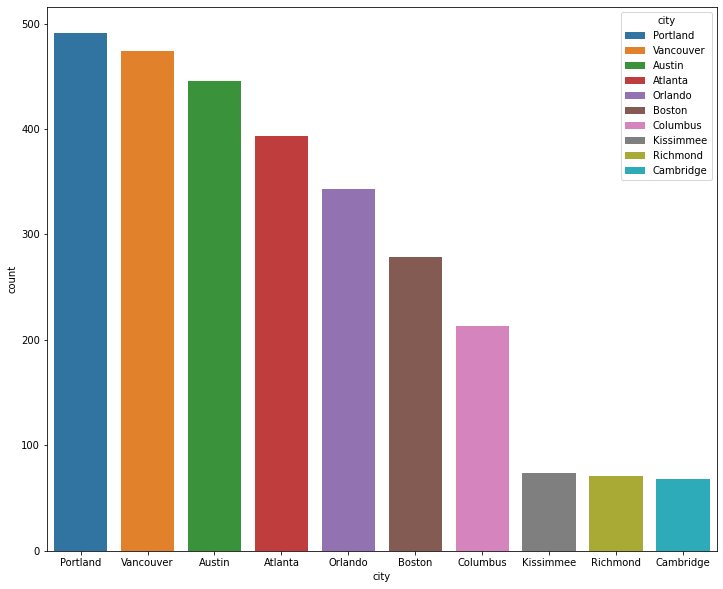

In [46]:
fig,ax= plt.subplots(figsize=(12,10))
sns.barplot(x="city",y='count',hue='city',data=top_10_df,ax=ax,dodge=False)

###**Top 10 restaurants listed on yelp**

In [47]:
top_10_res = data['name'].value_counts().head(10)

In [48]:
top_10_res_df = pd.DataFrame(data=top_10_res)
top_10_res_df.reset_index(level=0, inplace=True)
top_10_res_df.rename(columns = {'index':'restaurant','name':'count'}, inplace = True)
top_10_res_df.head()

,restaurant,count
0,McDonald's,53
1,Subway,42
2,Wendy's,35
3,Pizza Hut,31
4,Burger King,30


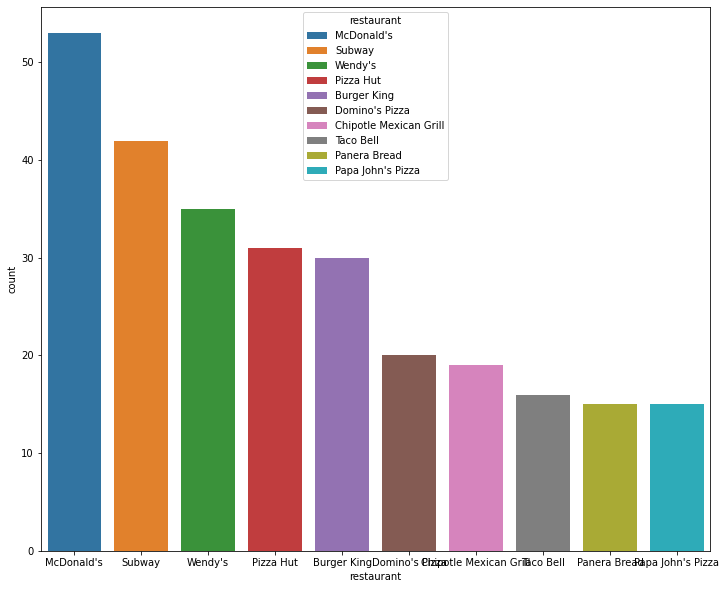

In [49]:
fig,ax= plt.subplots(figsize=(12,10))
sns.barplot(x="restaurant",y='count',hue='restaurant',data=top_10_res_df,ax=ax,dodge=False)

Text(0.5, 0.98, 'Top 20 Most Reviewed Businesses And Categories Lables Used')

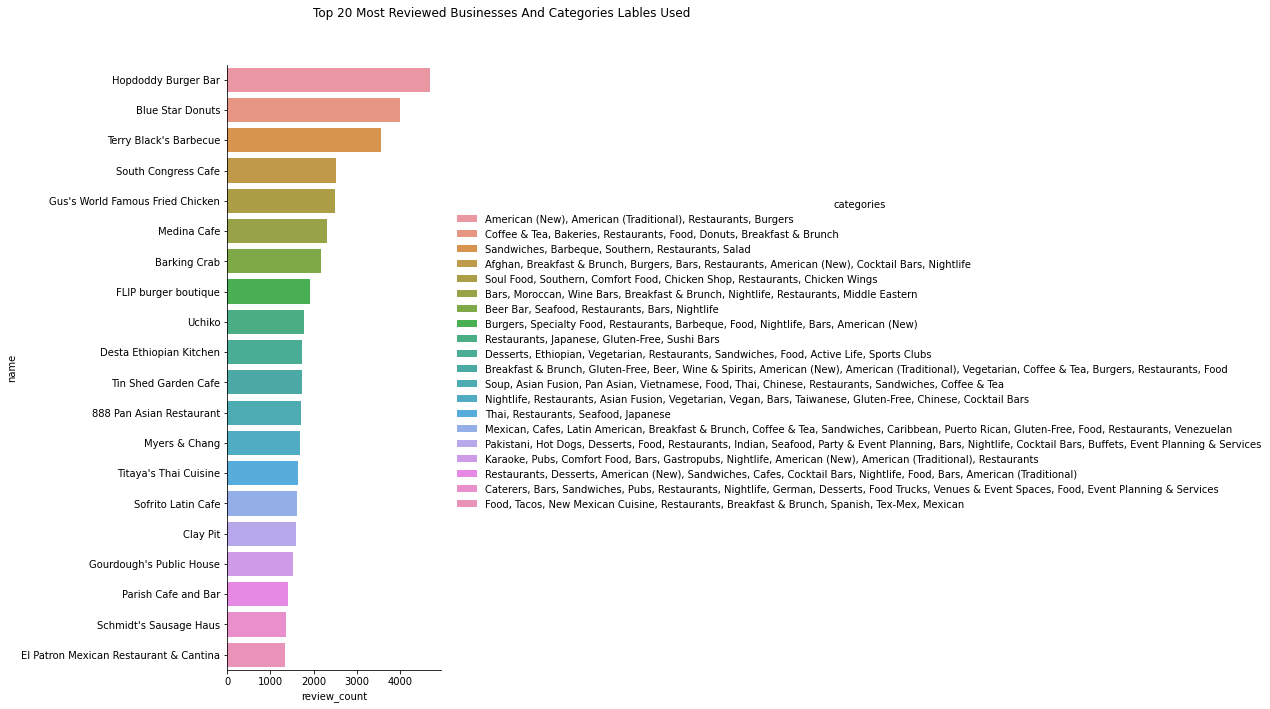

In [50]:
ax = sns.catplot(x="review_count", y="name",data= data.nlargest(20,'review_count'), 
                 kind="bar",hue= "categories", dodge= False, height= 10 )

plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Top 20 Most Reviewed Businesses And Categories Lables Used')

In [51]:
data['categories']

0       Gastropubs, Food, Beer Gardens, Restaurants, B...
1       Salad, Soup, Sandwiches, Delis, Restaurants, C...
2                                       Restaurants, Thai
3                                Food, Pizza, Restaurants
4       Restaurants, American (New), Bakeries, Dessert...
                              ...                        
4618    Fast Food, Burgers, Restaurants, Coffee & Tea,...
4619                       Indian, Restaurants, Pakistani
4620    Gluten-Free, Food Stands, Food, Restaurants, V...
4621                                 Italian, Restaurants
4622    Food, Coffee & Tea, Cafes, Restaurants, French...
Name: categories, Length: 4623, dtype: object

###**Making a dataset based on categories**

In [52]:
all_cities = data[data['categories'].str.contains('Rest.*')==True]

# Creating dummies dataframe from series for 'categories' 
df_rest = pd.Series(all_cities['categories']).str.get_dummies(',')

# Dropping Restaurants and Food columns as this analysis is for Resturants and these words are common to all entries
df_rest.drop(["Restaurants", " Restaurants", "Food", " Food"], axis=1, inplace=True)

# Removing the whitespaces from the column names
df_rest.columns = df_rest.columns.str.lstrip()

# Adding up all the rows to get the sum of columns and merging the columns with same names
all_rest = df_rest.groupby(by=df_rest.columns, axis=1).sum()

###**Vegetarian Restaurants**

In [53]:
all_rest.join(data).groupby('city').sum()['Vegetarian'].sort_values(ascending=False)

city
Portland      27
Austin        22
Atlanta       12
Vancouver     11
Boston        11
              ..
Groveport      0
Hapevile       0
Hapeville      0
Harrisburg     0
longwood       0
Name: Vegetarian, Length: 238, dtype: int64

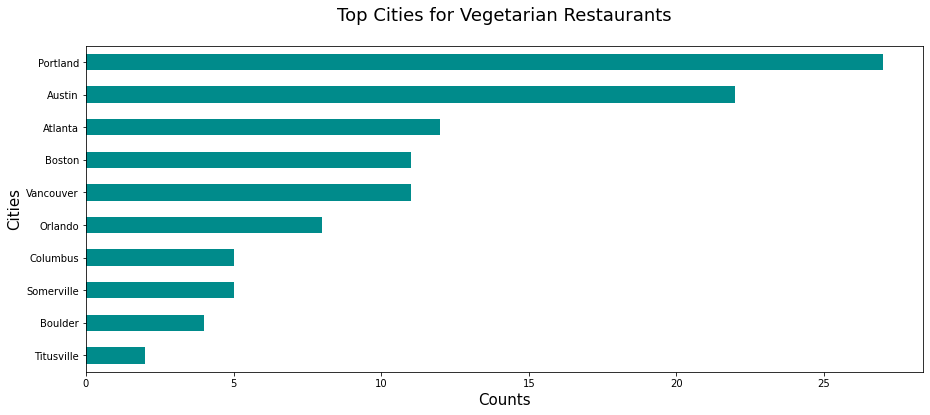

In [54]:
plt.figure(figsize=(15,6))
all_rest.join(data).groupby('city').sum()['Vegetarian'].sort_values(ascending=True).tail(10)\
                .plot(kind='barh',color='Darkcyan')
plt.title('Top Cities for Vegetarian Restaurants',fontsize=18, pad=25.0) 
plt.xlabel('Counts', fontsize=15)
plt.ylabel('Cities', fontsize=15)
plt.show()

In [55]:
Portland = all_rest.join(data)[all_rest.join(data)['city'] == 'Portland']
Port = Portland[['Vegetarian','name','address','latitude','longitude','stars','is_open','hours']]

# Sorting data as per their star ratings.
Port[ (Port['Vegetarian']==1) & (Portland['is_open']==1) ].sort_values(by='stars',ascending=False).head(10)

,Vegetarian,name,address,latitude,longitude,stars,is_open,hours
1533,1,The Pleasant Peasant,1080 SE Madison St,45.512791,-122.654873,5.0,1,"{'Monday': '0:0-0:0', 'Tuesday': '11:0-20:0', ..."
4011,1,Willow,2005 SE 11th Ave,45.508525,-122.654928,5.0,1,"{'Wednesday': '18:0-23:0', 'Thursday': '18:0-2..."
1029,1,Güero,200 NE 28th Ave,45.524462,-122.637035,4.5,1,"{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
1179,1,The Whole Bowl,4409 SE Hawthorne Blvd,45.512301,-122.616918,4.5,1,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
4043,1,Bol & Crust,5505 SE 28th Ave,45.482780,-122.638000,4.5,1,"{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."
1,1,Flying Elephants at PDX,7000 NE Airport Way,45.588906,-122.593331,4.0,1,"{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
1096,1,Tin Shed Garden Cafe,1438 NE Alberta St,45.558987,-122.650876,4.0,1,{'Monday': '8:0-14:0'}
2451,1,Van Hanh Restaurant-Vegan & Vegetarian,8446 SE Division St,45.504662,-122.576250,4.0,1,"{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
3873,1,People's Food Co-op,3029 SE 21st Ave,45.500779,-122.644953,4.0,1,"{'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'..."
4307,1,River Pig Saloon,529 NW 13th Ave,45.526905,-122.684481,4.0,1,"{'Monday': '14:0-22:0', 'Tuesday': '14:0-22:0'..."


In [56]:
# Creating a geographical map for the location of top vegetarian restaurants in Portland
import folium
import pandas as pd
from folium.plugins import MarkerCluster
 
# make a data frame with dots to show on the map
data_veg = Port[ (Port['Vegetarian']==1) & (Portland['is_open']==1) ].sort_values(by='stars',ascending=False)\
            [['longitude','latitude','name','address','stars','hours']].head(20)
 
# create an empty map
portland_veg_map = folium.Map(location=[45.508525,-122.654928], tiles='Stamen Terrain') #, default_zoom_start=20)
 
# add marker one by one on the map
for i in range(0, len(data_veg)):
    text = folium.Html('<b>Name: </b>'+ data_veg.iloc[i]['name'] + "<hr style='margin:10px;'>" + 
                       "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>" +
                       "<li>Star: " + str(data_veg.iloc[i]['stars']) + "</li>" +
                       "<li>Address: " + str(data_veg.iloc[i]['address']) + "</li>" +
                       "<li>Hours: " + str(data_veg.iloc[i]['hours']) + "</li>", script=True)

    popup = folium.Popup(text, max_width=2650)
    folium.Marker([ data_veg.iloc[i]['latitude'], data_veg.iloc[i]['longitude'] ], popup=popup).add_to(portland_veg_map)

In [57]:
portland_veg_map

###**Indian Restaurants**

In [58]:
all_rest.join(data).groupby('city').sum()['Indian'].sort_values(ascending=False)

city
Vancouver       14
Austin           9
Surrey           7
Somerville       5
Orlando          5
                ..
Hapevile         0
Hapeville        0
Happy Valley     0
Harrisburg       0
longwood         0
Name: Indian, Length: 238, dtype: int64

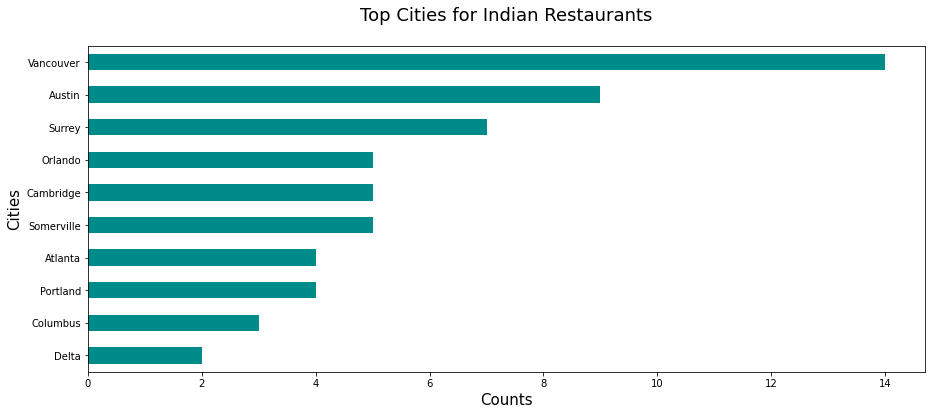

In [59]:
plt.figure(figsize=(15,6))
all_rest.join(data).groupby('city').sum()['Indian'].sort_values(ascending=True).tail(10)\
                .plot(kind='barh',color='Darkcyan')
plt.title('Top Cities for Indian Restaurants',fontsize=18, pad=25.0) 
plt.xlabel('Counts', fontsize=15)
plt.ylabel('Cities', fontsize=15)
plt.show()

In [60]:
Vancouver = all_rest.join(data)[all_rest.join(data)['city'] == 'Vancouver']
Van = Vancouver[['Indian','name','address','latitude','longitude','stars','is_open','hours']]

# Sorting data as per their star ratings.
Van[ (Van['Indian']==1) & (Vancouver['is_open']==1) ].sort_values(by='stars',ascending=False).head(10)

,Indian,name,address,latitude,longitude,stars,is_open,hours
4432,1,Indian Junction Bar & Grill,3364 Cambie Street,49.255258,-123.114778,4.5,1,"{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
1022,1,House of Dosas,1391 Kingsway,49.250466,-123.076325,4.0,1,"{'Monday': '11:0-3:0', 'Tuesday': '11:0-3:0', ..."
1203,1,Tandoori Fusion,2872 W Broadway,49.263968,-123.169557,4.0,1,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
2813,1,Dunbar Pizza & Grill,3348 Dunbar Street,49.257014,-123.184799,4.0,1,"{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ..."
2984,1,La Tandoori,6489 Victoria Drive,49.225516,-123.065937,4.0,1,"{'Monday': '14:30-22:0', 'Wednesday': '14:30-2..."
4238,1,Vij's Restaurant,3106 Cambie Street,49.257537,-123.114788,4.0,1,"{'Monday': '17:30-22:30', 'Tuesday': '17:30-22..."
2934,1,Best Quality Sweets & Restaurant,7260 Main Street,49.218800,-123.101596,3.5,1,"{'Monday': '9:0-20:30', 'Tuesday': '9:0-20:30'..."
3595,1,Siddhartha's Indian Kitchen,2066 Commercial Drive,49.266566,-123.069515,3.0,1,"{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."


In [61]:
data_ind = Van[ (Van['Indian']==1) & (Vancouver['is_open']==1) ].sort_values(by='stars',ascending=False)\
            [['longitude','latitude','name','address','stars','hours']].head(20)
 
# create an empty map
vancouver_ind_map = folium.Map(location=[49.255258,	-123.114778	], tiles='Stamen Terrain') #, default_zoom_start=20)
 
# add marker one by one on the map
for i in range(0, len(data_ind)):
    text = folium.Html('<b>Name: </b>'+ data_ind.iloc[i]['name'] + "<hr style='margin:10px;'>" + 
                       "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>" +
                       "<li>Star: " + str(data_ind.iloc[i]['stars']) + "</li>" +
                       "<li>Address: " + str(data_ind.iloc[i]['address']) + "</li>" +
                       "<li>Hours: " + str(data_ind.iloc[i]['hours']) + "</li>", script=True)

    popup = folium.Popup(text, max_width=2650)
    folium.Marker([ data_ind.iloc[i]['latitude'], data_ind.iloc[i]['longitude'] ], popup=popup).add_to(vancouver_ind_map)

In [62]:
vancouver_ind_map

###**Dataset for Recommender Systems**

In [63]:
data.head()

,Unnamed: 0,address,business_id,categories,city,hours,is_open,latitude,longitude,name,review_count,stars,state
0,0,921 Pearl St,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,40.017544,-105.283348,Oskar Blues Taproom,86,4.0,CO
1,1,7000 NE Airport Way,tCbdrRPZA0oiIYSmHG3J0w,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",Portland,"{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",1,45.588906,-122.593331,Flying Elephants at PDX,126,4.0,OR
2,5,3755 Main St,D4JtQNTI4X3KcbzacDJsMw,"Restaurants, Thai",Vancouver,"{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",1,49.251342,-123.101333,Bob Likes Thai Food,169,3.5,BC
3,12,474 Lowell St,HPA_qyMEddpAEtFof02ixg,"Food, Pizza, Restaurants",Peabody,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1,42.541155,-70.973438,Mr G's Pizza & Subs,39,4.0,MA
4,13,247 E Michigan St,ufCxltuh56FF4-ZFZ6cVhg,"Restaurants, American (New), Bakeries, Dessert...",Orlando,"{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18...",1,28.513265,-81.374707,Sister Honey's,135,4.5,FL


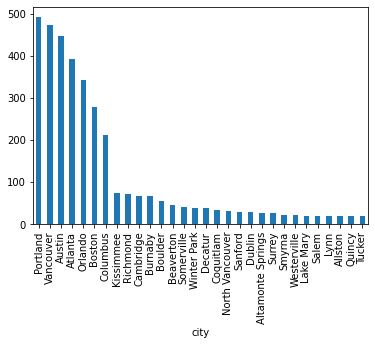

In [64]:
df_bus_groups = data.groupby('city').count()
df_bus_city = df_bus_groups['name']
df_bus_city_sorted = df_bus_city.sort_values(ascending = False)
df_bus_city_sorted[:30].plot(kind = 'bar')

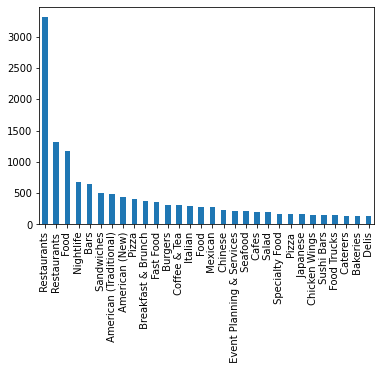

In [65]:
uniq_cat_dict = {}
for i in data.categories:
    cat = str(i).split(',')
    for j in cat:
        if j not in uniq_cat_dict.keys():
            uniq_cat_dict[j] = 1
        else:
            uniq_cat_dict[j] += 1
uniq_cat_series = pd.Series(uniq_cat_dict)
uniq_cat_series.sort_values(ascending = False, inplace = True)
uniq_cat_series[:30].plot(kind = 'bar')

In [66]:
df_reduced = data2.drop(['Unnamed: 0','text','useful','cool', 'date', 'funny'], axis = 1)
df_reduced.head()

,business_id,review_id,stars,user_id
0,buF9druCkbuXLX526sGELQ,lWC-xP3rd6obsecCYsGZRg,4,ak0TdVmGKo4pwqdJSTLwWw
1,0AzLzHfOJgL7ROwhdww2ew,T5fAqjjFooT4V0OeZyuk1w,2,SFQ1jcnGguO0LYWnbbftAA
2,8zehGz9jnxPqXtOc7KaJxA,sjm_uUcQVxab_EeLCqsYLg,4,0kA0PAJ8QFMeveQWHFqz2A
3,xGXzsc-hzam-VArK6eTvtw,J4a2TuhDasjn2k3wWtHZnQ,1,RNm_RWkcd02Li2mKPRe7Eg
4,EXOsmAB1s71WePlQk0WZrA,28gGfkLs3igtjVy61lh77Q,2,Q8c91v7luItVB0cMFF_mRA


In [67]:
df_merged = df_reduced.merge(data[['city','categories', 'business_id']], how = 'outer', on= 'business_id')
df_merged.head()

,business_id,review_id,stars,user_id,city,categories
0,buF9druCkbuXLX526sGELQ,lWC-xP3rd6obsecCYsGZRg,4,ak0TdVmGKo4pwqdJSTLwWw,Beverly,"Restaurants, Wine Bars, Nightlife, Farmers Mar..."
1,buF9druCkbuXLX526sGELQ,hpcZLEzqD4_gPi6eSVi_Bg,2,Y-j2svl0M_5-jF1ehYuNPQ,Beverly,"Restaurants, Wine Bars, Nightlife, Farmers Mar..."
2,buF9druCkbuXLX526sGELQ,3FvY1Se8y2WXqTbaANOqMw,5,xUCX4GhBpeWxZB0l2lmt_w,Beverly,"Restaurants, Wine Bars, Nightlife, Farmers Mar..."
3,buF9druCkbuXLX526sGELQ,C1uQNP2ehBktS43ZRMEvkg,5,2M6KFsWIUXElqcQRz4A0Qg,Beverly,"Restaurants, Wine Bars, Nightlife, Farmers Mar..."
4,buF9druCkbuXLX526sGELQ,Cja8_35_kQDnF9g4voikzw,1,t5SRIRU6INiAyVkiMJhRPA,Beverly,"Restaurants, Wine Bars, Nightlife, Farmers Mar..."


In [68]:
df_merged.to_csv("merged.csv",index=False)

In [69]:
df_merged.shape

(277523, 6)

In [70]:
n_users = df_merged.user_id.unique().shape[0]
n_items = df_merged.business_id.unique().shape[0]

print('Number of users: {}'.format(n_users))
print('Number of items: {}'.format(n_items))
print('Sparsity: {:4.3f}%'.format(float(df_merged.shape[0]) / float(n_users*n_items) * 100))

Number of users: 188398
Number of items: 4623
Sparsity: 0.032%


In [71]:
# checking if there are duplicate reviews
data_dup = data2.groupby(['business_id','user_id']).agg(['count']).reset_index()


In [72]:
# computing users with more than one review

duplicates = data_dup.useful.sort_values(by = 'count',ascending = False).reset_index()
duplicates[duplicates['count'] >1].shape

(5169, 2)

In [73]:
multiple_reviewers = duplicates[duplicates['count']>1]['index']

In [74]:
multiple_reviewers

0       216511
1        86617
2       201011
3        52147
4        36551
         ...  
5164     93001
5165    100640
5166    268803
5167    269789
5168    127537
Name: index, Length: 5169, dtype: int64

In [75]:
'''
for ind in multiple_reviewers:
    tmp = data2[(data2.user_id == data_dup.loc[ind, 'user_id'][0]) & 
                 (data2.business_id == data_dup.loc[ind, 'business_id'][0])].sort_values(by = 'date', ascending = True)
    data2.drop(tmp.index[0:len(tmp.index)-1],inplace=True)
'''

"\nfor ind in multiple_reviewers:\n    tmp = data2[(data2.user_id == data_dup.loc[ind, 'user_id'][0]) & \n                 (data2.business_id == data_dup.loc[ind, 'business_id'][0])].sort_values(by = 'date', ascending = True)\n    data2.drop(tmp.index[0:len(tmp.index)-1],inplace=True)\n"

In [76]:
'''
check = data2.groupby(['business_id','user_id']).agg(['count']).reset_index()
tmp = check.useful.sort_values(by = 'count',ascending = False).reset_index()
tmp[tmp['count'] >1].shape
'''

"\ncheck = data2.groupby(['business_id','user_id']).agg(['count']).reset_index()\ntmp = check.useful.sort_values(by = 'count',ascending = False).reset_index()\ntmp[tmp['count'] >1].shape\n"

###**Represents the share of each Review**

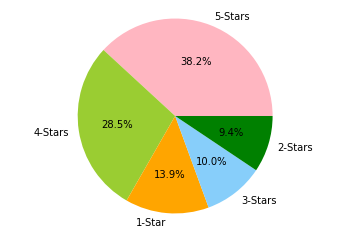

In [77]:
labels = '5-Stars', '4-Stars', '1-Star', '3-Stars', '2-Stars'
sizes = df_merged["stars"].value_counts()
colors = ['lightpink', 'yellowgreen', 'orange', 'lightskyblue','green']
# Plot
plt.pie(sizes, labels=labels, colors =colors, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

### **1. Building the Basic Recommender System**

In [78]:
from collections import Counter
users = df_merged.user_id
user_count = dict(Counter(users))

In [79]:
len(user_count)

188398

#### **Filtering Reviewers that have a review count of more that 10**

In [80]:
over10 = {x : user_count[x] for x in user_count if user_count[x] >= 10 }

In [81]:
len(over10)

1221

In [82]:
users10 = list(over10)

In [83]:
users10

['djp57omz9cccV1wI0_sqqA',
 '4w7TXcPola5W7Mf_8xJi5A',
 'O3nhfuz6W4wlmIQgM_Oo2g',
 'dC5kYsLGGoLLVlMjeMqfLw',
 'mZM-6gO_JRq2wyFEdGNVKA',
 'zOxDBdPvVTqirXGl71Ed9g',
 'uh0u3E7mbYz6dr2z9RdF5w',
 'ugGd3ctRaKfc19JHxcrgyQ',
 'FLMRT4tDE4VlM1wyDK5QGg',
 'SWirJzXX_7a7wZUcl3P84A',
 'rcU7ysY41qGppbw4pQgjqg',
 'PeIFSmI0I1ILYjUjjUSZdA',
 'Sizp7DaB_NNuV6IF6_JKgA',
 'OlZJq794cGTPfYomFo89cA',
 'cumYM_K8wMZZjmrp3tlpRw',
 'Yds_fV9S4-XDnKgTI2LPpw',
 '-H0yU9OFytKr3AcIuWrWpA',
 'U11TV1lxynwDLonw4Ofk4w',
 'CpB00022d3I7EhxaM9lNhA',
 'SAjoxK-DfszGMRF-96AxjA',
 'cvrYcvhjZyyMWBNNWXlT8Q',
 'WTurWYOFVsVBOgy_HF_Oiw',
 '6ma0naV9VyXvUwFgyLmi_w',
 'rk73ya6FQe7fL45cHPCfbA',
 'ir689oBNmrJXOspb4yq_Jg',
 '34Al3p8NZfjLU_iPauoWsA',
 'kV0-BeGBGAKNL_WXykQbLA',
 'KiHezw05wPk7Q6q3j_JNUA',
 'fLhsOqTS51MJwg0g50glIA',
 'u-DznYiLB9VByDcTuE_9pg',
 'HwcjEqA1V3bKtb07JKGIKQ',
 'oTpInzEzsg3wgvMO7IIiGA',
 'd3hJX_LRO5bIgeRN_wgwEw',
 'oGK0fy4zTnIzrYM_rzhGDA',
 'ukCAVNbolx0_gaAkDYZnEA',
 '6wGjjZkbAhcPnorLeh6INg',
 'wZPizeBxMAyOSl0M0zuCjg',
 

In [84]:
boolean_series = df_merged.user_id.isin(users10)
filtered_df = df_merged[boolean_series]

In [85]:
filtered_df.head()

,business_id,review_id,stars,user_id,city,categories
7,buF9druCkbuXLX526sGELQ,0amIc8rKH1E8dMNFMu5MeA,3,djp57omz9cccV1wI0_sqqA,Beverly,"Restaurants, Wine Bars, Nightlife, Farmers Mar..."
36,buF9druCkbuXLX526sGELQ,92d0ElSVY-PPtcAXw1IMSQ,4,4w7TXcPola5W7Mf_8xJi5A,Beverly,"Restaurants, Wine Bars, Nightlife, Farmers Mar..."
118,0AzLzHfOJgL7ROwhdww2ew,ZNLlDlWbDWJzDhp7lGuseQ,4,O3nhfuz6W4wlmIQgM_Oo2g,Orlando,"Hotels, Hotels & Travel, Restaurants, Event Pl..."
155,0AzLzHfOJgL7ROwhdww2ew,RH_gth9aQ_Pa_8DFq5Q0fg,3,dC5kYsLGGoLLVlMjeMqfLw,Orlando,"Hotels, Hotels & Travel, Restaurants, Event Pl..."
158,0AzLzHfOJgL7ROwhdww2ew,cLs2CGhsuDx43WRoTmzmEA,4,mZM-6gO_JRq2wyFEdGNVKA,Orlando,"Hotels, Hotels & Travel, Restaurants, Event Pl..."


In [86]:
filtered_df.shape

(18221, 6)

In [87]:
n_users = filtered_df.user_id.unique().shape[0]
n_items = filtered_df.business_id.unique().shape[0]

print('Number of users: {}'.format(n_users))
print('Number of items: {}'.format(n_items))
print('Sparsity: {:4.3f}%'.format(float(filtered_df.shape[0]) / float(n_users*n_items) * 100))

Number of users: 1221
Number of items: 3160
Sparsity: 0.472%


#### **Taking the restaurant names**

In [88]:
list_of_res = list(data.name.unique())

In [89]:
list_of_res

['Oskar Blues Taproom',
 'Flying Elephants at PDX',
 'Bob Likes Thai Food',
 "Mr G's Pizza & Subs",
 "Sister Honey's",
 'Everything POP Shopping & Dining',
 'RaceTrac',
 'Cascade Restaurant',
 'Longwood Galleria',
 'Legal Sea Foods',
 'ARGO',
 'Espresso Minute',
 "Cleary's Restaurant & Spirits",
 'El Pollo Rey',
 'Eurasia Sushi Bar & Seafood',
 'Texas Roadhouse',
 'Kerala Kitchen',
 'Cafe Yumm!',
 'Magical Pizza Express',
 'Taco Bell',
 'Panda Express',
 "Gigi's Roast Beef & Pizza",
 "Wendy's",
 'Great Wraps',
 'Chuck E. Cheese',
 'Olmecas Mexican Restaurant',
 'JP Licks',
 "Yan's China Bistro",
 'Piece of Cake',
 "Andy's Frozen Custard",
 'Sabor Latino - Puerto Rican Cuisine & Gallery',
 'Whole Time Chicken',
 'B Street Coffee House',
 'Viuda Bistro',
 'Urban Pantry',
 'First China Restaurant',
 'Taqueria So Mexican',
 'Pho Oanh',
 '1st Avenue Seafood by Pocha',
 'Sapporo Ramen',
 'Long John Silvers',
 'Something Fishy',
 'VietRiver',
 'Fukami Sushiya',
 "Let's Roll Custom Sushi Bar",

In [90]:
len(list_of_res)

3934

#### **Making a new dataframe**

In [91]:
df = df_reduced.merge(data[['city','categories', 'business_id','name']], how = 'outer', on= 'business_id')
df.head()

,business_id,review_id,stars,user_id,city,categories,name
0,buF9druCkbuXLX526sGELQ,lWC-xP3rd6obsecCYsGZRg,4,ak0TdVmGKo4pwqdJSTLwWw,Beverly,"Restaurants, Wine Bars, Nightlife, Farmers Mar...",Prides Osteria
1,buF9druCkbuXLX526sGELQ,hpcZLEzqD4_gPi6eSVi_Bg,2,Y-j2svl0M_5-jF1ehYuNPQ,Beverly,"Restaurants, Wine Bars, Nightlife, Farmers Mar...",Prides Osteria
2,buF9druCkbuXLX526sGELQ,3FvY1Se8y2WXqTbaANOqMw,5,xUCX4GhBpeWxZB0l2lmt_w,Beverly,"Restaurants, Wine Bars, Nightlife, Farmers Mar...",Prides Osteria
3,buF9druCkbuXLX526sGELQ,C1uQNP2ehBktS43ZRMEvkg,5,2M6KFsWIUXElqcQRz4A0Qg,Beverly,"Restaurants, Wine Bars, Nightlife, Farmers Mar...",Prides Osteria
4,buF9druCkbuXLX526sGELQ,Cja8_35_kQDnF9g4voikzw,1,t5SRIRU6INiAyVkiMJhRPA,Beverly,"Restaurants, Wine Bars, Nightlife, Farmers Mar...",Prides Osteria


In [92]:
boolean_series = df.user_id.isin(users10)
df_2 = df[boolean_series]

In [93]:
df_2.drop('review_id',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [94]:
df_2.head()

,business_id,stars,user_id,city,categories,name
7,buF9druCkbuXLX526sGELQ,3,djp57omz9cccV1wI0_sqqA,Beverly,"Restaurants, Wine Bars, Nightlife, Farmers Mar...",Prides Osteria
36,buF9druCkbuXLX526sGELQ,4,4w7TXcPola5W7Mf_8xJi5A,Beverly,"Restaurants, Wine Bars, Nightlife, Farmers Mar...",Prides Osteria
118,0AzLzHfOJgL7ROwhdww2ew,4,O3nhfuz6W4wlmIQgM_Oo2g,Orlando,"Hotels, Hotels & Travel, Restaurants, Event Pl...",Renaissance Orlando at SeaWorld
155,0AzLzHfOJgL7ROwhdww2ew,3,dC5kYsLGGoLLVlMjeMqfLw,Orlando,"Hotels, Hotels & Travel, Restaurants, Event Pl...",Renaissance Orlando at SeaWorld
158,0AzLzHfOJgL7ROwhdww2ew,4,mZM-6gO_JRq2wyFEdGNVKA,Orlando,"Hotels, Hotels & Travel, Restaurants, Event Pl...",Renaissance Orlando at SeaWorld


**Ratings for individual Restaurants**

In [95]:
df_2.groupby('name')['stars'].mean().head(10)

name
 Gruby's New York Deli                    3.375000
1048 Bar and Grill                        3.666667
163 Vietnamese Sandwiches & Bubble Tea    4.000000
1776 Cheesesteak                          4.333333
1A Pizza                                  4.000000
1st Avenue Seafood by Pocha               4.000000
204 Washington                            5.000000
3 Monkeys Pub & Grill                     4.000000
33 & Melt                                 4.000000
33 Restaurant & Lounge                    3.111111
Name: stars, dtype: float64

**Ratings for Best Restaurants**

In [96]:
df_2.groupby('name')['stars'].mean().sort_values(ascending=False).head()

name
Mama Noy's Food Truck    5.0
Skyebird                 5.0
Rescue Bagels            5.0
Caspian Kabob            5.0
Restaurant Jezebel       5.0
Name: stars, dtype: float64

**The total number of ratings for each restaurant**

In [97]:
df_2.groupby('name')['stars'].count().sort_values(ascending=False).head()

name
Hopdoddy Burger Bar      82
Parish Cafe and Bar      69
Barking Crab             68
Saus                     66
Titaya's Thai Cuisine    66
Name: stars, dtype: int64

**Create ratings_mean_count dataframe and first add the average rating of each movie to this dataframe**

In [98]:
ratings_mean_count = pd.DataFrame(df_2.groupby('name')['stars'].mean())

In [99]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df_2.groupby('name')['stars'].count())

In [100]:
ratings_mean_count.head()

,stars,rating_counts
name,,
Gruby's New York Deli,3.375000,8
1048 Bar and Grill,3.666667,3
163 Vietnamese Sandwiches & Bubble Tea,4.000000,17
1776 Cheesesteak,4.333333,3
1A Pizza,4.000000,1


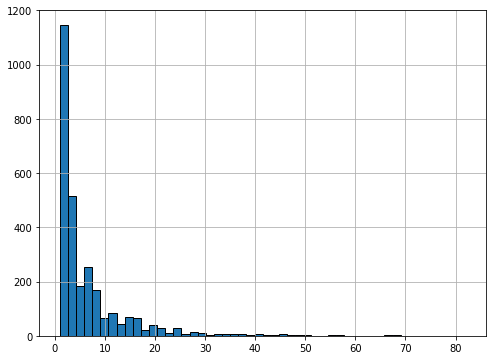

In [101]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

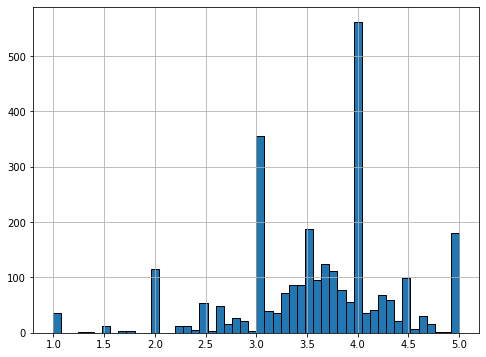

In [102]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['stars'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

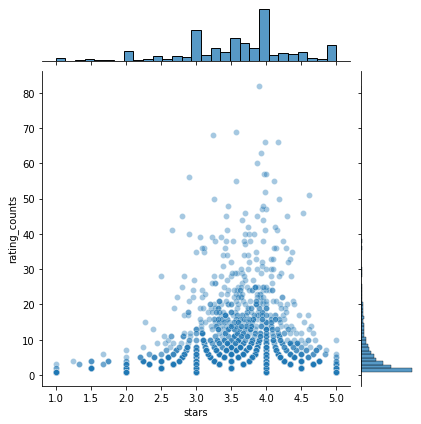

In [103]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='stars', y='rating_counts', data=ratings_mean_count, alpha=0.4)

In [104]:
user_res_rating = df_2.pivot_table(index='user_id', columns='name', values='stars')

In [105]:
user_res_rating.head()

name,Gruby's New York Deli,1048 Bar and Grill,163 Vietnamese Sandwiches & Bubble Tea,1776 Cheesesteak,1A Pizza,1st Avenue Seafood by Pocha,204 Washington,3 Monkeys Pub & Grill,33 & Melt,33 Restaurant & Lounge,338 Grill,34th Street Cafe,360 Pizza,4 Rivers Smokehouse,40 North,43 Church,4th Street Bar & Grill,5 Star Pizza,50 Plates,753 South,80 Thoreau,88 Tofu House,888 Pan Asian Restaurant,99 Restaurants,A Fork In the Road - Norwell,A Land Remembered,A Slice Of NY Pizza,A Slice of New York,A Thai Basil,A Touch of Basil,A&W,A1 Grill & Pizza,A4 Pizza Bar,ABODE Restaurant & Coffee Bar,ARGO,ARUGULARIUM Creperie Bakery,Abaee Noodle,Abhiruchi Indian Cuisine,Across the Street,Adam's Pizza,...,Yi Soon Bakery,Yim Bento,Yogi's Hoagies,Yoi Yoi Japanese Steakhouse & Sushi,Yoko Sushi,Yokohama Teppanyaki,Yolks,Yook Korean Grilled BBQ & Bistro,Yoree Korean Cuisine,Your Inn Tavern,Yume Japanese Restaurant,Yummi Tacos & More,Yummy Asia House,Yummy Sushi,Yummy Thai,Yummy Thai Food,Yummy-Coco Cafe,Yuyo,Z Square,Zab-E-Lee Thai & Sushi,Zack's American Bistro,Zaya Mediterranean Cuisine,Zaza New Cuban Diner,Zeitoon Restaurant,Zen Japanese Food Fast,Zen Japanese Grill & Sushi Bar,Zen on Ten,Zeus Greek Street Food,Zibas Pitas,Zo Greek,Zoe's Chinese Restaurant,Zoes Kitchen,Zudaka Healthy Latin Food,Zunzi's,Zuzu Handmade Mexican Food,bartaco,blu on the avenue,iThai Restaurant,la Madeleine French Bakery & Cafe,sweetgreen
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-0MQ4webH2uc1ZAsGsNENg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-0O2d7C1KFutGQmdCtJmYA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2sNTzGyci98Mp9PmPRg8w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3k65IY08ckDcOGQmf8BDg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-5uvOHRkvijt1vzSX9RqzQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
missing_values_table(user_res_rating)

Your selected dataframe has 2827 columns.
There are 2827 columns that have missing values.


,Missing Values,% of Total Values
name,,
Rainbow Butterfly Restaurant,1220,99.9
Davis Square Pizza & Subs,1220,99.9
Osio,1220,99.9
Daily Grind Natural Foods,1220,99.9
Daily Juice Cafe,1220,99.9
...,...,...
Myers & Chang,1164,95.3
Saus,1157,94.8
Parish Cafe and Bar,1155,94.6


**Ratings for Hopdoddy Burger Bar**

In [107]:
Burger = user_res_rating['Hopdoddy Burger Bar']

In [108]:
Burger.head()

user_id
-0MQ4webH2uc1ZAsGsNENg   NaN
-0O2d7C1KFutGQmdCtJmYA   NaN
-2sNTzGyci98Mp9PmPRg8w   NaN
-3k65IY08ckDcOGQmf8BDg   NaN
-5uvOHRkvijt1vzSX9RqzQ   NaN
Name: Hopdoddy Burger Bar, dtype: float64

In [109]:
res_like_burger = user_res_rating.corrwith(Burger)

corr= pd.DataFrame(res_like_burger, columns=['Correlation'])
corr.dropna(inplace=True)
corr.head()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
name,
34th Street Cafe,-0.333333
888 Pan Asian Restaurant,0.410513
Alamo Drafthouse Cinema South Lamar,0.746816
Alta's Cafe,1.000000
Andiamo Ristorante,-0.126323


In [110]:

corr.sort_values('Correlation', ascending=False).head(10)

,Correlation
name,
Macho Taco,1.0
Cafe Josie,1.0
The Mean Eyed Cat,1.0
Crazy Cajun,1.0
Hat Creek Burger Company Burnet,1.0
El Sunzal Restaurant,1.0
Chicken Express,1.0
China Cafe by Phoenix,1.0
Sushi Junai 2,1.0


In [111]:

corr = corr.join(ratings_mean_count['rating_counts'])
corr.head()

,Correlation,rating_counts
name,,
34th Street Cafe,-0.333333,6
888 Pan Asian Restaurant,0.410513,33
Alamo Drafthouse Cinema South Lamar,0.746816,17
Alta's Cafe,1.000000,7
Andiamo Ristorante,-0.126323,14


In [112]:
corr[corr['rating_counts']>50].sort_values('Correlation', ascending=False).head()

,Correlation,rating_counts
name,,
Parish Cafe and Bar,1.000000,69
Hopdoddy Burger Bar,1.000000,82
Barley Swine,0.607210,51
Chipotle Mexican Grill,0.348960,56
Titaya's Thai Cuisine,0.274259,66


###**2. Implementing item-based collaborative filtering**

In [113]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

In [114]:
data.head()

,Unnamed: 0,address,business_id,categories,city,hours,is_open,latitude,longitude,name,review_count,stars,state
0,0,921 Pearl St,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,40.017544,-105.283348,Oskar Blues Taproom,86,4.0,CO
1,1,7000 NE Airport Way,tCbdrRPZA0oiIYSmHG3J0w,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",Portland,"{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",1,45.588906,-122.593331,Flying Elephants at PDX,126,4.0,OR
2,5,3755 Main St,D4JtQNTI4X3KcbzacDJsMw,"Restaurants, Thai",Vancouver,"{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",1,49.251342,-123.101333,Bob Likes Thai Food,169,3.5,BC
3,12,474 Lowell St,HPA_qyMEddpAEtFof02ixg,"Food, Pizza, Restaurants",Peabody,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1,42.541155,-70.973438,Mr G's Pizza & Subs,39,4.0,MA
4,13,247 E Michigan St,ufCxltuh56FF4-ZFZ6cVhg,"Restaurants, American (New), Bakeries, Dessert...",Orlando,"{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18...",1,28.513265,-81.374707,Sister Honey's,135,4.5,FL


In [115]:
business_df = data[data['categories'].str.contains("Food|Coffee|Tea|Restaurants|Bakeries|Bars|Sports Bar|Pubs|Nighlife")]
business_df.head()

,Unnamed: 0,address,business_id,categories,city,hours,is_open,latitude,longitude,name,review_count,stars,state
0,0,921 Pearl St,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,40.017544,-105.283348,Oskar Blues Taproom,86,4.0,CO
1,1,7000 NE Airport Way,tCbdrRPZA0oiIYSmHG3J0w,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",Portland,"{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",1,45.588906,-122.593331,Flying Elephants at PDX,126,4.0,OR
2,5,3755 Main St,D4JtQNTI4X3KcbzacDJsMw,"Restaurants, Thai",Vancouver,"{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",1,49.251342,-123.101333,Bob Likes Thai Food,169,3.5,BC
3,12,474 Lowell St,HPA_qyMEddpAEtFof02ixg,"Food, Pizza, Restaurants",Peabody,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1,42.541155,-70.973438,Mr G's Pizza & Subs,39,4.0,MA
4,13,247 E Michigan St,ufCxltuh56FF4-ZFZ6cVhg,"Restaurants, American (New), Bakeries, Dessert...",Orlando,"{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18...",1,28.513265,-81.374707,Sister Honey's,135,4.5,FL


In [116]:
business_df.drop(['Unnamed: 0','address','hours','is_open','latitude','longitude','state'],axis=1,inplace=True)
business_df.head()

,business_id,categories,city,name,review_count,stars
0,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,Oskar Blues Taproom,86,4.0
1,tCbdrRPZA0oiIYSmHG3J0w,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",Portland,Flying Elephants at PDX,126,4.0
2,D4JtQNTI4X3KcbzacDJsMw,"Restaurants, Thai",Vancouver,Bob Likes Thai Food,169,3.5
3,HPA_qyMEddpAEtFof02ixg,"Food, Pizza, Restaurants",Peabody,Mr G's Pizza & Subs,39,4.0
4,ufCxltuh56FF4-ZFZ6cVhg,"Restaurants, American (New), Bakeries, Dessert...",Orlando,Sister Honey's,135,4.5


In [117]:
review_df = df_reduced.drop('review_id',axis=1)
review_df.head()

,business_id,stars,user_id
0,buF9druCkbuXLX526sGELQ,4,ak0TdVmGKo4pwqdJSTLwWw
1,0AzLzHfOJgL7ROwhdww2ew,2,SFQ1jcnGguO0LYWnbbftAA
2,8zehGz9jnxPqXtOc7KaJxA,4,0kA0PAJ8QFMeveQWHFqz2A
3,xGXzsc-hzam-VArK6eTvtw,1,RNm_RWkcd02Li2mKPRe7Eg
4,EXOsmAB1s71WePlQk0WZrA,2,Q8c91v7luItVB0cMFF_mRA


In [118]:
joined_restaurant_rating = pd.merge(business_df, review_df, on='business_id')

In [119]:
joined_restaurant_rating.head()

,business_id,categories,city,name,review_count,stars_x,stars_y,user_id
0,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,Oskar Blues Taproom,86,4.0,5,93z0yh-sUpGZS-cSKu6xxA
1,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,Oskar Blues Taproom,86,4.0,2,Q_CZIvnsDHjpls-EPzzG7Q
2,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,Oskar Blues Taproom,86,4.0,5,rqxTSFFj5fZNmabY1fmTlw
3,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,Oskar Blues Taproom,86,4.0,4,vNPxlt5f50q0e2nVAScW3Q
4,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,Oskar Blues Taproom,86,4.0,4,eXRC79iX60xwA1UuGRuWNg


### Note : **stars_x** represents the restaurant rating

In [120]:
joined_restaurant_rating = pd.merge(business_df, review_df, on='business_id')
restaurant_ratingCount = (joined_restaurant_rating.
     groupby(by = ['name'])['stars_x'].
     count().
     reset_index().
     rename(columns = {'stars_x': 'totalRatingCount'})
     [['name', 'totalRatingCount']]
    )
restaurant_ratingCount.head()

,name,totalRatingCount
0,Gruby's New York Deli,58
1,#FROYO Premium Frozen Yogurt,5
2,081 Wood Fired Pizza,1
3,1000 Degrees Neapolitan Pizzeria,1
4,1048 Bar and Grill,19


#### **Joining the two tables**

In [121]:
rating_with_totalRatingCount = joined_restaurant_rating.merge(restaurant_ratingCount, left_on = 'name', right_on = 'name', how = 'left')

In [122]:
rating_with_totalRatingCount.head()

,business_id,categories,city,name,review_count,stars_x,stars_y,user_id,totalRatingCount
0,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,Oskar Blues Taproom,86,4.0,5,93z0yh-sUpGZS-cSKu6xxA,28
1,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,Oskar Blues Taproom,86,4.0,2,Q_CZIvnsDHjpls-EPzzG7Q,28
2,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,Oskar Blues Taproom,86,4.0,5,rqxTSFFj5fZNmabY1fmTlw,28
3,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,Oskar Blues Taproom,86,4.0,4,vNPxlt5f50q0e2nVAScW3Q,28
4,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",Boulder,Oskar Blues Taproom,86,4.0,4,eXRC79iX60xwA1UuGRuWNg,28


In [123]:
populatity_threshold = rating_with_totalRatingCount['totalRatingCount'].quantile(0.90)

In [124]:
populatity_threshold

690.0

In [125]:
rating_popular_rest = rating_with_totalRatingCount.query('totalRatingCount >= @populatity_threshold')
rating_popular_rest.shape

(27818, 9)

In [126]:
rating_popular_rest['city'].value_counts()

Austin           12223
Boston            4623
Portland          3572
Atlanta           2772
Vancouver         1398
Orlando            792
Columbus           767
Hingham            656
Lynnfield          264
Peabody            201
Clackamas          111
Sanford             95
Quincy              91
Waltham             54
Cambridge           40
Sunset Valley       33
Lake Mary           30
Beaverton           24
Powell              22
Dublin              22
Saint Cloud         20
Reading              8
Name: city, dtype: int64

The top 10 cities I’m selecting are Austin, Boston, Portland, Atlanta, Vancouver, Columbus, Hingham, Lynnfield, Peabody, Clackamas.

In [127]:
us_city_user_rating = rating_popular_rest[rating_popular_rest['city'].str.contains("Austin|Boston|Portland|Atlanta|Vancouver|Columbus|Hingham|Lynnfield|Peabody|Clackamas")]

In [128]:
us_city_user_rating = us_city_user_rating.drop_duplicates(['user_id', 'name'])
restaurant_features = us_city_user_rating.pivot(index = 'name', columns = 'user_id', values = 'stars_x').fillna(0)

In [129]:
restaurant_features_matrix = csr_matrix(restaurant_features.values)

#### **Fitting the model**

In [130]:
knn_recomm = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
knn_recomm.fit(restaurant_features_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [131]:
randomChoice = np.random.choice(restaurant_features.shape[0])
distances, indices = knn_recomm.kneighbors(restaurant_features.iloc[randomChoice].values.reshape(1, -1), n_neighbors = 11)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for Restaurant {0} on priority basis:\n'.format(restaurant_features.index[randomChoice]))
    else:
        print('{0}: {1}'.format(i, restaurant_features.index[indices.flatten()[i]]))

Recommendations for Restaurant 888 Pan Asian Restaurant on priority basis:

1: Hopdoddy Burger Bar
2: Titaya's Thai Cuisine
3: Gus's World Famous Fried Chicken
4: Curra's Grill
5: South Congress Cafe
6: Gourdough's Public House
7: Clay Pit
8: Uchiko
9: Terry Black's Barbecue
10: Chipotle Mexican Grill


### **Another Baseline Model - Item Similarity**

In [132]:
final = pd.read_csv("/content/Final_Matrix.csv")

In [133]:
X = final.drop("user_id",axis=1)
y = final["user_id"]

In [134]:
mat = X.fillna(0)

In [135]:
matrix = mat[mat.columns].astype(int)

In [136]:
matrix.head()

,Gruby's New York Deli,1048 Bar and Grill,163 Vietnamese Sandwiches & Bubble Tea,1776 Cheesesteak,1A Pizza,1st Avenue Seafood by Pocha,204 Washington,3 Monkeys Pub & Grill,33 & Melt,33 Restaurant & Lounge,338 Grill,34th Street Cafe,360 Pizza,4 Rivers Smokehouse,40 North,43 Church,4th Street Bar & Grill,5 Star Pizza,50 Plates,753 South,80 Thoreau,88 Tofu House,888 Pan Asian Restaurant,99 Restaurants,A Fork In the Road - Norwell,A Land Remembered,A Slice Of NY Pizza,A Slice of New York,A Thai Basil,A Touch of Basil,A&W,A1 Grill & Pizza,A4 Pizza Bar,ABODE Restaurant & Coffee Bar,ARGO,ARUGULARIUM Creperie Bakery,Abaee Noodle,Abhiruchi Indian Cuisine,Across the Street,Adam's Pizza,...,Yi Soon Bakery,Yim Bento,Yogi's Hoagies,Yoi Yoi Japanese Steakhouse & Sushi,Yoko Sushi,Yokohama Teppanyaki,Yolks,Yook Korean Grilled BBQ & Bistro,Yoree Korean Cuisine,Your Inn Tavern,Yume Japanese Restaurant,Yummi Tacos & More,Yummy Asia House,Yummy Sushi,Yummy Thai,Yummy Thai Food,Yummy-Coco Cafe,Yuyo,Z Square,Zab-E-Lee Thai & Sushi,Zack's American Bistro,Zaya Mediterranean Cuisine,Zaza New Cuban Diner,Zeitoon Restaurant,Zen Japanese Food Fast,Zen Japanese Grill & Sushi Bar,Zen on Ten,Zeus Greek Street Food,Zibas Pitas,Zo Greek,Zoe's Chinese Restaurant,Zoes Kitchen,Zudaka Healthy Latin Food,Zunzi's,Zuzu Handmade Mexican Food,bartaco,blu on the avenue,iThai Restaurant,la Madeleine French Bakery & Cafe,sweetgreen
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [137]:
ratings = matrix.values

In [138]:
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print (f'Sparsity: {sparsity}')

Sparsity: 0.4956302091073934


In [139]:
def cosine_similarity(ratings, epsilon=1e-9):
    # epsilon -> small number for handling dived-by-zero errors
    sim = ratings.T.dot(ratings) + epsilon
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return (sim / (norms * norms.T))

In [140]:
item_similarity = cosine_similarity(ratings)

In [141]:
item_similarity

array([[1.00000000e+00, 3.65880867e-11, 6.60703204e-12, ...,
        3.04431283e-11, 2.19528520e-11, 1.94037631e-11],
       [3.65880867e-11, 1.00000000e+00, 2.00643088e-11, ...,
        9.24500327e-11, 6.66666667e-11, 5.89255651e-11],
       [6.60703204e-12, 2.00643088e-11, 1.00000000e+00, ...,
        1.66945141e-11, 1.20385853e-11, 1.06407066e-11],
       ...,
       [3.04431283e-11, 9.24500327e-11, 1.66945141e-11, ...,
        1.00000000e+00, 5.54700196e-11, 4.90290338e-11],
       [2.19528520e-11, 6.66666667e-11, 1.20385853e-11, ...,
        5.54700196e-11, 1.00000000e+00, 3.53553391e-11],
       [1.94037631e-11, 5.89255651e-11, 1.06407066e-11, ...,
        4.90290338e-11, 3.53553391e-11, 1.00000000e+00]])

In [142]:
def calculate_y_um(ratings, similarity):
  item_bias = ratings.mean(axis=0)
  ratings = (ratings - item_bias[np.newaxis, :]).copy()
  pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
  pred += item_bias[np.newaxis, :]    
  return pred

In [143]:
item_pred = calculate_y_um(ratings, item_similarity)

In [144]:
pd.DataFrame(item_pred)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2787,2788,2789,2790,2791,2792,2793,2794,2795,2796,2797,2798,2799,2800,2801,2802,2803,2804,2805,2806,2807,2808,2809,2810,2811,2812,2813,2814,2815,2816,2817,2818,2819,2820,2821,2822,2823,2824,2825,2826
0,-0.011296,-0.003758,0.010381,0.317030,-0.007395,-0.017147,-0.006576,-0.015098,-0.010158,-0.015082,-0.027452,0.127950,0.067548,-0.006797,0.029287,-0.023933,-0.003489,-0.033255,-0.006872,-0.043959,-0.018578,-0.007989,0.290077,-0.019762,-0.035518,-0.010920,-0.009332,-0.016614,-0.024176,-0.010252,-0.008873,-0.029765,-0.025568,-0.008156,-0.003260,-0.008168,-0.018773,-0.012945,0.010563,-0.035999,...,0.020682,0.083891,-0.009398,-0.020445,-0.010952,-0.021062,0.012423,-0.009763,0.006116,-0.016357,-0.013877,0.099197,-0.017990,-0.026880,-0.021346,0.198550,-0.012778,0.011981,-0.039286,-0.004819,0.093033,-0.002521,0.001952,-0.009907,0.119304,-0.003450,-0.021940,-0.014993,0.018829,0.038860,-0.002274,0.014679,0.000446,-0.015040,0.133820,0.035798,-0.007543,-0.032196,-0.027408,-0.014494
1,-0.011296,-0.003758,0.010381,-0.022718,-0.007395,0.073354,-0.006576,-0.015098,-0.010158,-0.015082,-0.027452,-0.017138,-0.018797,-0.006797,-0.024867,-0.023933,-0.003489,-0.033255,-0.006872,-0.043959,-0.018578,-0.007989,0.065376,-0.019762,-0.035518,-0.010920,-0.009332,-0.016614,-0.024176,-0.010252,0.084264,-0.029765,-0.025568,0.043300,0.117173,-0.008168,-0.018773,-0.012945,0.010563,-0.035999,...,0.020682,-0.025454,-0.009398,-0.020445,-0.010952,0.169865,0.143588,0.250375,-0.022526,-0.016357,0.161118,-0.010450,-0.017990,0.100939,-0.021346,-0.026384,0.075726,-0.026296,-0.039286,-0.004819,-0.013994,-0.002521,0.001952,-0.008499,-0.004339,-0.003450,-0.021940,-0.014993,-0.015552,0.028838,-0.002274,0.010727,0.000446,-0.015040,-0.009700,0.035798,-0.007543,-0.032196,-0.027408,-0.014494
2,-0.011296,-0.003758,0.010381,0.022989,-0.007395,-0.017147,-0.006576,-0.015098,-0.010158,-0.015082,-0.027452,0.236841,0.133509,-0.006797,0.098913,-0.023933,-0.003489,-0.033255,-0.006872,-0.043959,-0.018578,-0.007989,0.264828,-0.019762,-0.035518,-0.010920,0.039365,-0.016614,-0.024176,-0.010252,-0.008873,-0.029765,-0.025568,-0.008156,-0.003260,-0.008168,-0.018773,-0.012945,0.010563,-0.035999,...,0.020682,-0.025454,-0.009398,-0.020445,-0.010952,-0.021062,0.012423,-0.009763,0.304658,-0.016357,-0.013877,0.171187,-0.017990,-0.026880,-0.021346,0.019664,-0.012778,0.144336,-0.039286,-0.004819,0.077430,-0.002521,0.025529,-0.009907,0.369109,-0.003450,-0.021940,-0.014993,-0.015552,0.028838,-0.002274,0.035768,0.000446,-0.015040,0.128358,0.035798,-0.007543,-0.032196,0.138497,-0.014494
3,-0.011296,-0.003758,0.195833,-0.022718,-0.007395,-0.017147,-0.006576,-0.015098,-0.010158,1.315159,0.035216,-0.017138,-0.018797,-0.006797,-0.024867,0.092716,-0.003489,0.118300,-0.006872,-0.043959,0.240206,-0.004972,0.065376,0.221121,0.031808,-0.010920,-0.009332,-0.016614,-0.024176,-0.010252,-0.008873,0.036206,0.029819,-0.008156,-0.003260,-0.008168,-0.018773,-0.012945,0.010563,0.066077,...,0.102113,-0.025454,-0.009398,-0.020445,-0.010952,-0.021062,0.012423,-0.009763,-0.022526,-0.016357,-0.013877,-0.010450,-0.017990,-0.026880,0.067408,-0.026384,-0.012778,-0.026296,0.040239,-0.004819,-0.013994,-0.002521,0.001952,-0.009907,-0.002253,0.277856,-0.021940,-0.014993,-0.015552,0.165327,0.109127,0.010727,0.000446,-0.015040,-0.009700,0.035798,-0.007543,-0.032196,-0.027408,0.096622
4,-0.011296,-0.003758,0.010381,-0.022718,-0.007395,0.058746,-0.006576,-0.015098,-0.010158,-0.015082,-0.027452,-0.017138,-0.018797,-0.006797,-0.024867,-0.023933,-0.003489,-0.033255,-0.006872,-0.043959,-0.018578,-0.007989,0.065376,-0.019762,-0.035518,-0.010920,-0.009332,-0.016614,-0.024176,-0.010252,0.038704,-0.029765,-0.025568,0.018872,0.031605,-0.008168,-0.018773,-0.012945,0.010563,-0.035999,...,0.020682,-0.025454,-0.009398,-0.020445,0.023830,0.214232,0.063154,0.113215,-0.022526,-0.016357,-0.013877,-0.010450,-0.017990,-0.026880,-0.021346,-0.0263